In [3]:
import numpy as np
from sklearn.datasets import make_spd_matrix
import math
import statsmodels.api as sm # for OLS 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from catboost import CatBoostRegressor, CatBoostClassifier

# Our ML algorithm 

# Set up the environment 
randomseednumber = 11022018
np.random.seed(randomseednumber)
N = 5000 # No. obs 
k = 10 # = No. variables in x_i 
theta = 0.5 # Structural parameter 
b = [1/k for k in range(1,11)] # x weights 
sigma = make_spd_matrix(k, random_state=randomseednumber)

# Number of simulations 
MC_no = 50

def g(x):
    return np.power(np.sin(x),2)

def m(x,nu=0.,gamma=1.):
    return 0.5/math.pi*(np.sinh(gamma))/(np.cosh(gamma)-np.cos(x-nu))

# Array of estimated thetas to store results 
theta_est = np.zeros(shape=[MC_no,3])

for i in range(MC_no):
    # Generate data: no. obs x no. variables in x_i     
    X = np.random.multivariate_normal(np.ones(k),sigma,size=[N,])
    G = g(np.dot(X,b))
    M = m(np.dot(X,b))
    D = M+np.random.standard_normal(size=[N,])
    #D = np.where(D>np.median(D),1,0)
    #M_ = (np.max(M)-M)/(np.max(M)-np.min(M))
    #D = np.where(M_>0.9,1,0)
    Y = np.dot(theta,D)+G+np.random.standard_normal(size=[N,])
    
    # Now run the different methods      
    # OLS --------------------------------------------------     
    OLS = sm.OLS(Y,np.c_[D,X])
    results = OLS.fit()
    theta_est[i][0] = results.params[0]

    # Naive double machine Learning ------------------------     
    naiveDMLg =RandomForestRegressor(max_depth=2)
    # Compute ghat     
    naiveDMLg.fit(X,Y)
    Ghat = naiveDMLg.predict(X)
    naiveDMLm =RandomForestRegressor(max_depth=2)
    naiveDMLm.fit(X,D)
    Mhat = naiveDMLm.predict(X)
    # vhat as residual     
    Vhat = D-Mhat
    theta_est[i][1] = np.mean(np.dot(Vhat,Y-Ghat))/np.mean(np.dot(Vhat,D))

    # Cross-fitting DML -----------------------------------     # Split the sample     
    I = np.random.choice(N,np.int(N/2),replace=False)
    I_C = [x for x in np.arange(N) if x not in I]
    # Ghat for both     
    Ghat_1 = RandomForestRegressor(max_depth=2,verbose=False).fit(X[I],Y[I]).predict(X[I_C])
    Ghat_2 = RandomForestRegressor(max_depth=2,verbose=False).fit(X[I_C],Y[I_C]).predict(X[I])
    # Mhat and vhat for both     
    Mhat_1 = RandomForestRegressor(max_depth=2,verbose=False).fit(X[I],D[I]).predict(X[I_C])
    Mhat_2 = RandomForestRegressor(max_depth=2,verbose=False).fit(X[I_C],D[I_C]).predict(X[I])
    Vhat_1 = D[I_C] - Mhat_1
    Vhat_2 = D[I] - Mhat_2
    theta_1 = np.mean(np.dot(Vhat_1,(Y[I_C]-Ghat_1)))/np.mean(np.dot(Vhat_1,D[I_C]))
    theta_2 = np.mean(np.dot(Vhat_2,(Y[I]-Ghat_2)))/np.mean(np.dot(Vhat_2,D[I]))
    theta_est[i][2] = 0.5*(theta_1+theta_2)


/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = np.random.choice(N,np.int(N/2),replace=False)
/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = np.random.choice(N,np.int(N/2),replace=False)
/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = np.random.choice(N,np.int(N/2),replace=False)
/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I = np.random.choice(N,np.int(N/2),replace=False)
/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_751/1315728713.py:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

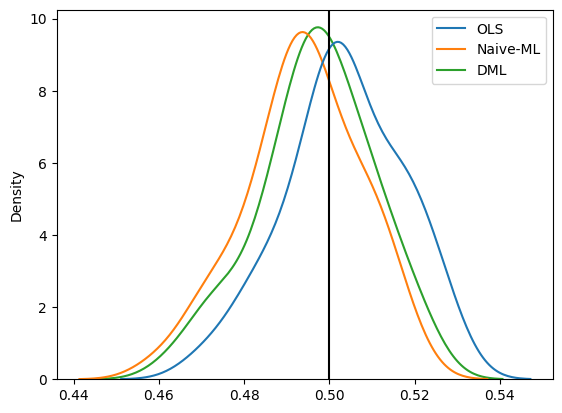

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(theta_est,columns=['OLS','Naive-ML','DML'])
sns.kdeplot(df)
plt.axvline(0.5, color='black')

In [5]:
np.mean(theta_est,axis=0)

array([0.50340867, 0.4937324 , 0.49685044])

In [6]:
np.std(theta_est,axis=0)

array([0.01354079, 0.01326557, 0.01324677])

In [8]:
    OLS = sm.OLS(Y,np.c_[D,X])
    results = OLS.fit()
    theta_est[i][0] = results.params[0]
    results.bse[0]

In [11]:
results.bse

array([0.01509522, 0.01858179, 0.02296939, 0.01915572, 0.02342514,
       0.0316033 , 0.02034218, 0.01184274, 0.01936648, 0.02001029,
       0.02469408])